Running with 5 iterations (Optimal is ~2)
{'1110': 635, '1101': 613, '1001': 875, '0110': 822, '0001': 600, '1111': 569, '1000': 621, '0111': 605, '1011': 598, '0100': 630, '0010': 604, '0101': 590, '0000': 598, '1010': 552, '0011': 545, '1100': 543}


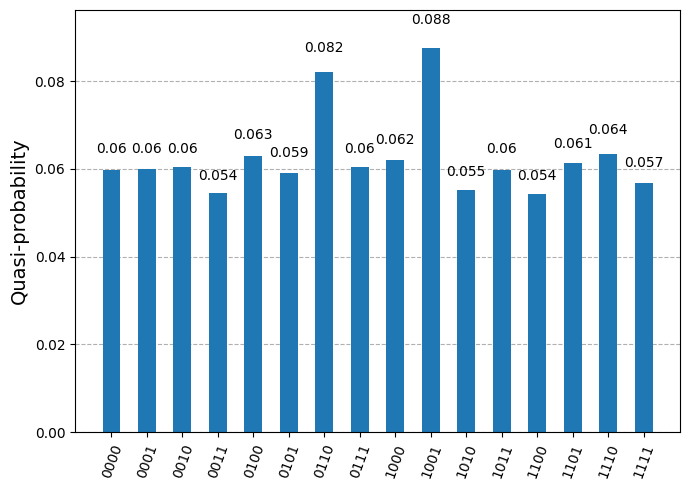

In [1]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

# Step 1. Setup standard problem for 4-qubit marked states
marked_states = ["0110", "1001"]
oracle = Grover_oracle(marked_states)
operator = Grover_operator(oracle)

n = 4  # number of qubits

# Step 2. FORCE 5 iterations (Over-rotation)
forced_iterations = 5
print(f"Running with {forced_iterations} iterations (Optimal is ~2)")

qc = QuantumCircuit(n)
qc.h(range(n))  # put all qubits in superposition

for _ in range(forced_iterations):
    qc.compose(operator, inplace=True)

qc.measure_all()

# Step 3. Run on backend using the fake provider and 10000 shots
backend = FakeAlgiers()
data_pub = Get_Data_from_Fake_backend(10000, qc, backend)
counts = data_pub.meas.get_counts()
print(counts)

# Step 4. Plot the results
plot_distribution(counts)